In [1]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(patchwork)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




# load seurat object

In [2]:
cDC  <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.rds")

In [3]:
DefaultAssay(cDC) <- 'SCT'

# Plotting

In [4]:
CD4 <- read.csv('/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cpdb/CD4T_cDC_cpdbResults042622.csv')
CD8 <- read.csv('/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cpdb/CD8T_cDC_cpdbResults042622.csv')

In [5]:
CD8[CD8$source == 'c7(FLT+ Teff)']$source <- 'c7(FTL+ Teff)'
CD8[CD8$target == 'c7(FLT+ Teff)']$target <- 'c7(FTL+ Teff)'

In [6]:
cpdb_summarised <- rbind(CD4, CD8) %>%
    filter(source == 'cDC3') %>%
    filter(target != 'cDC1' &target != 'cDC2'& target != 'cDC3') %>%
    filter(pvalue <= 0.05) %>% 
    mutate(interaction = paste0(ligand.complex, '->', receptor.complex)) %>% 
    group_by(source, target,interaction) %>%
    summarise(n = n(), lr.mean = mean(lr.mean)) 

`summarise()` has grouped output by 'source', 'target'. You can override using the `.groups` argument.


In [7]:
cDC3_interaction <- cpdb_summarised['interaction'] %>% unique()
cDC3_interaction$incDC3 <- TRUE

In [8]:
cpdb_summarised <- merge(cpdb_summarised, cDC3_interaction, all= TRUE)%>% 
    filter(incDC3 == TRUE) 

cpdb_summarised[["source"]][is.na(cpdb_summarised[["source"]])] <- 'cDC1'
cpdb_summarised[["target"]][is.na(cpdb_summarised[["target"]])] <- 'CD8T_ 0'
cpdb_summarised[is.na(cpdb_summarised)] <- 0


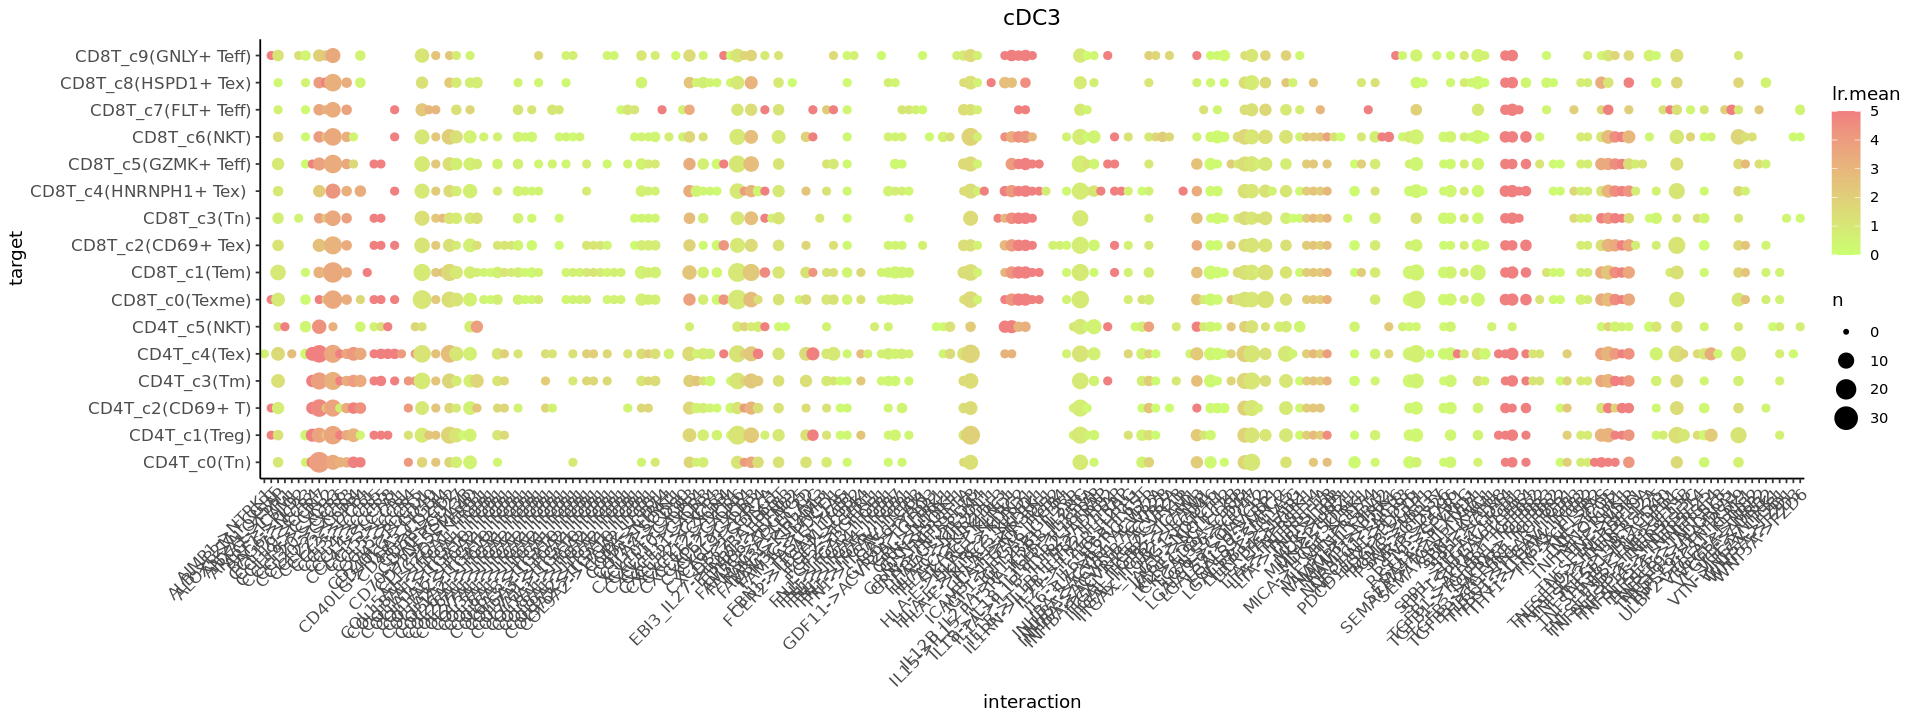

In [9]:
options(repr.plot.width=16, repr.plot.height=6)
cpdb_summarised %>%
 ggplot(aes(interaction, target, col=lr.mean)) +
 ggtitle(unique(cpdb_summarised$source)) +
 geom_point(aes(size = n)) +
 theme_classic()+
scale_color_gradient(low="darkolivegreen1",high="lightcoral",  limits = c(0,5),oob = scales::squish)+
    scale_size_continuous(limits = c(0,30))+
  theme(axis.text.x = element_text(angle=45, size =10,  hjust=1, vjust=1), 
        axis.text.y = element_text( size =10), 
        plot.title = element_text(hjust = 0.5))
        

#  plot a subset of interation

## T cells as target

In [10]:
POI <- data.frame(interaction = c('CCL17->CCR4','CCL19->CCR7', 'CCL19->CXCR3', 'CCL22->CCR4', 'CCL22->DPP4',
                                   'CD70->CD27','GRN->TNFRSF1A', 'GRN->TNFRSF1B','PDCD1LG2->PDCD1'), inDC3 = TRUE)

In [11]:
source_cell <- 'cDC2'

In [12]:
cpdb_summarised <- rbind(CD4, CD8) %>%
    filter(source == source_cell) %>%
    filter(target != 'cDC1' &target != 'cDC2'& target != 'cDC3') %>%
    filter(pvalue <= 0.05) %>% 
    mutate(interaction = paste0(ligand.complex, '->', receptor.complex)) %>% 
    group_by(source, target,interaction) %>%
    summarise(n = n(), lr.mean = mean(lr.mean)) 
#     filter(interaction %in% POI)
    

`summarise()` has grouped output by 'source', 'target'. You can override using the `.groups` argument.


In [13]:
cpdb_summarised <- merge(cpdb_summarised, POI, all= TRUE) %>% filter(inDC3 == TRUE)

cpdb_summarised[["source"]][is.na(cpdb_summarised[["source"]])] <- source_cell
cpdb_summarised[["target"]][is.na(cpdb_summarised[["target"]])] <- 'CD8T_c3(Tn)'
cpdb_summarised[is.na(cpdb_summarised)] <- 0

In [14]:
options(repr.plot.width=8, repr.plot.height=6)
p2 <- cpdb_summarised %>%
 ggplot(aes(interaction, target, col=lr.mean)) +
 ggtitle(source_cell) +
 geom_point(aes(size = n)) +
 theme_classic()+
scale_color_gradient(low="darkolivegreen1",high="lightcoral",  limits = c(0,5),oob = scales::squish)+
    scale_size_continuous(limits = c(0,30))+
  theme(axis.text.x = element_text(angle=45, size =12,  hjust=1, vjust=1), 
        axis.text.y = element_text( size =12), 
        plot.title = element_text(hjust = 0.5))

In [15]:
options(repr.plot.width=18, repr.plot.height=2.5)

p4 <-VlnPlot(cDC, features = c('CCL17','CCL19', 'CCL22',
                                   'CD70','GRN','PDCD1LG2'), ncol =6)

Warning message:
“Removed 3 rows containing missing values (geom_point).”


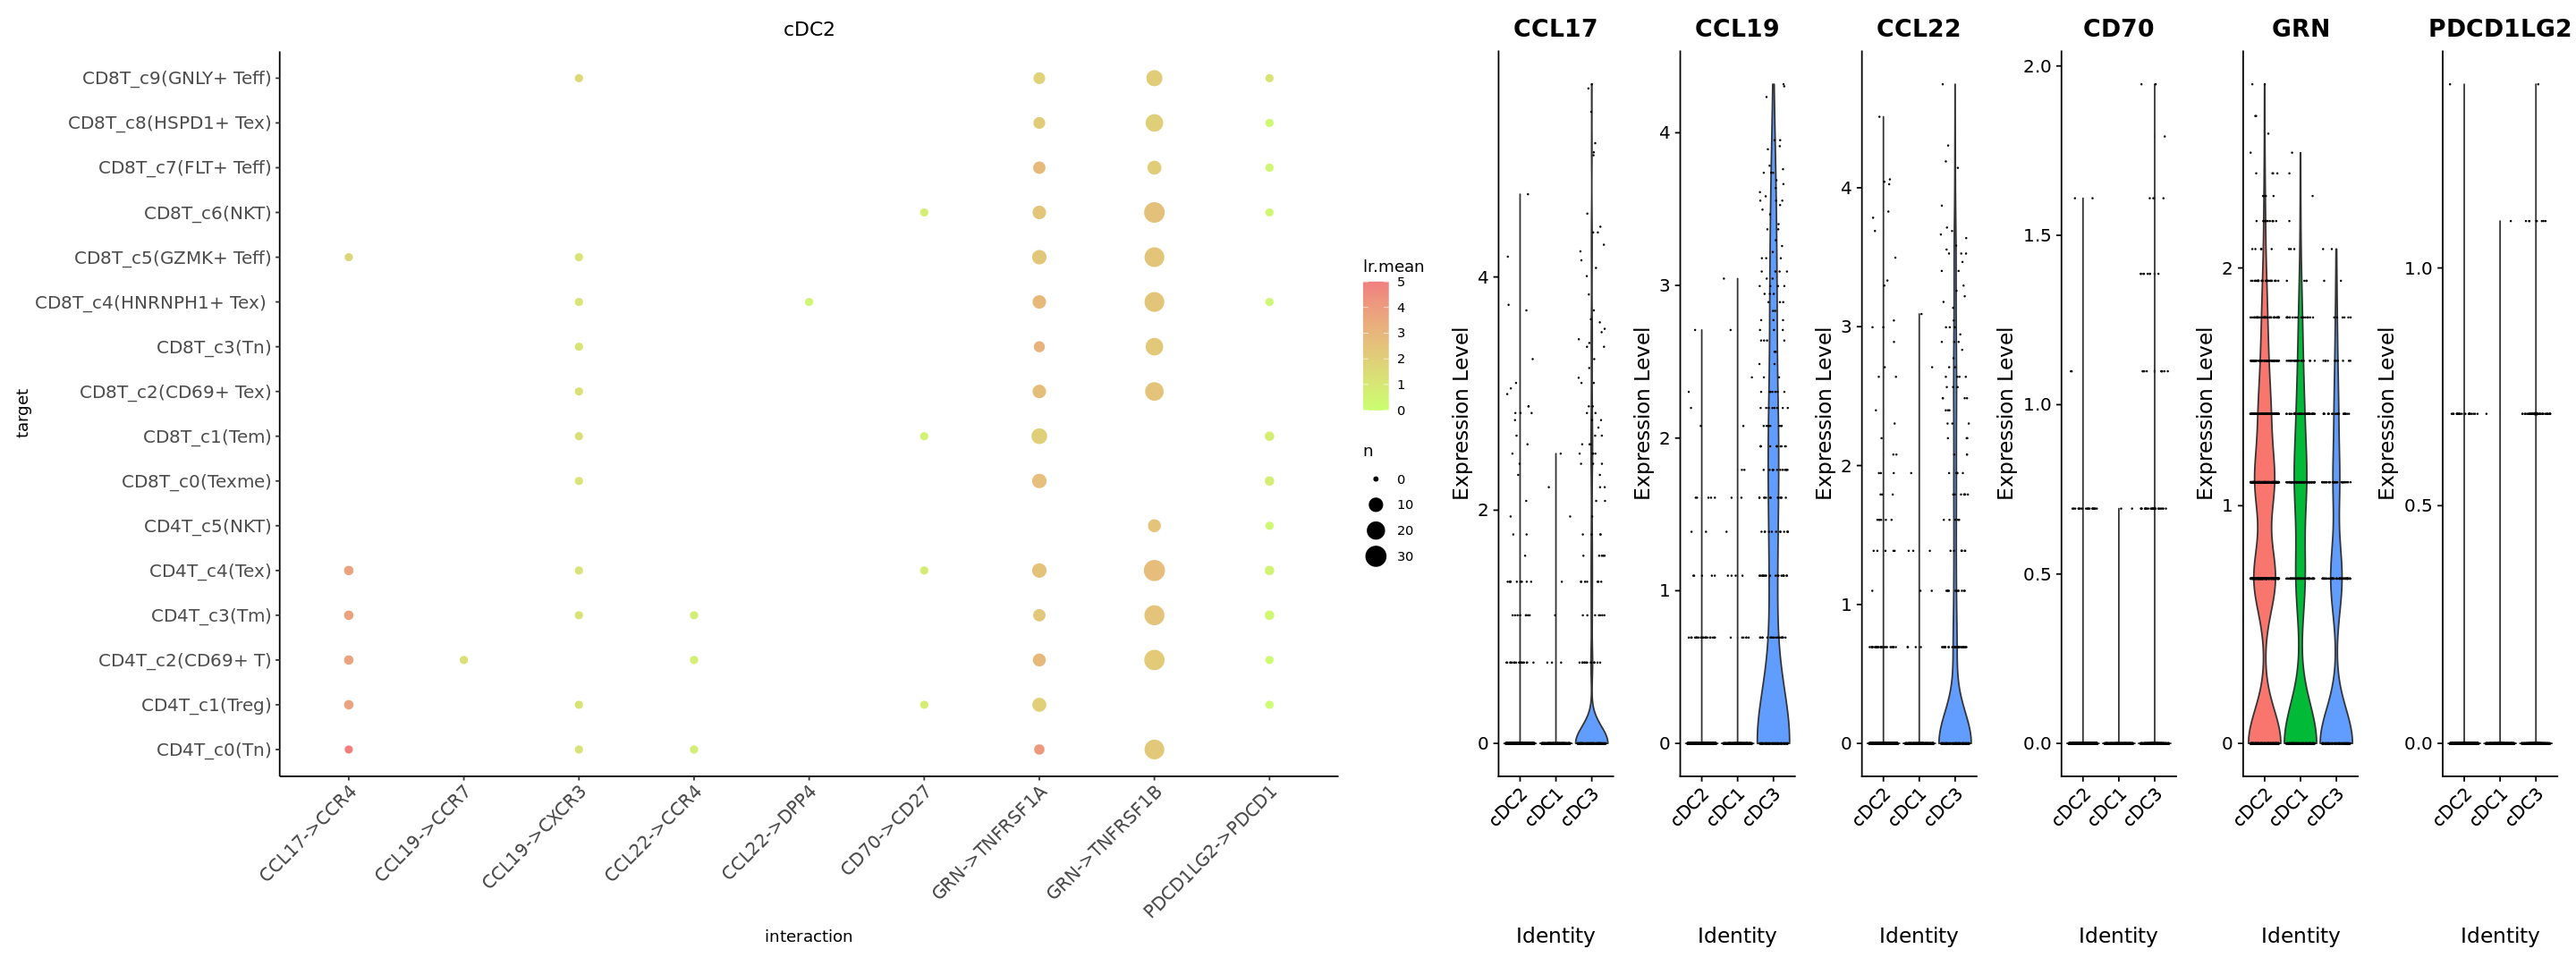

In [17]:
options(repr.plot.width=24, repr.plot.height=9)
# (p1+p2+p3)/p4+  plot_layout(heights = c(4, 1))
p2+p4

## cDC as target

In [55]:
POI <- data.frame(interaction = c('APP->CD74','MIF->CD74','COPA->CD74','TNFSF13B->HLA-DPB1', 'TNFSF9->HLA-DPA1',
                                  'TNFSF9->TNFRSF9','TNFSF9->PVR'), inDC3 = TRUE)

In [56]:
cpdb<- rbind(CD4, CD8) %>%
    filter(source != 'cDC1' &source != 'cDC2'& source != 'cDC3') %>%
    filter(pvalue <= 0.05) %>% 
    mutate(interaction = paste0(ligand.complex, '->', receptor.complex)) %>% 
    group_by(source, target,interaction) %>%
    summarise(n = n(), lr.mean = mean(lr.mean)) 

`summarise()` has grouped output by 'source', 'target'. You can override using the `.groups` argument.



In [62]:
target_cell <- 'cDC3'

cpdb_summarised <- merge(cpdb, POI, all= TRUE) %>% filter(inDC3 == TRUE)  %>%
            filter(target == target_cell)

In [63]:
cpdb_summarised[["source"]][is.na(cpdb_summarised[["source"]])] <- 'CD8T_c3(Tn)'
cpdb_summarised[["target"]][is.na(cpdb_summarised[["target"]])] <- target_cell
cpdb_summarised[is.na(cpdb_summarised)] <- 0


p3<- cpdb_summarised %>%
 ggplot(aes(interaction, source, col=lr.mean)) +
 ggtitle(target_cell) +
 geom_point(aes(size = n)) +
 theme_classic()+
scale_color_gradient(low="lightblue2",high="lightcoral",  limits = c(0,100),oob = scales::squish)+
    scale_size_continuous(limits = c(0,30))+
  theme(axis.text.x = element_text(angle=45, size =12,  hjust=1, vjust=1), 
        axis.text.y = element_text( size =12), 
        plot.title = element_text(hjust = 0.5))

In [64]:
options(repr.plot.width=18, repr.plot.height=2.5)

p4<- VlnPlot(cDC, features = c('CD74','HLA-DPB1', 'HLA-DPA1',
                                   'TNFRSF9','PVR'), ncol =5)

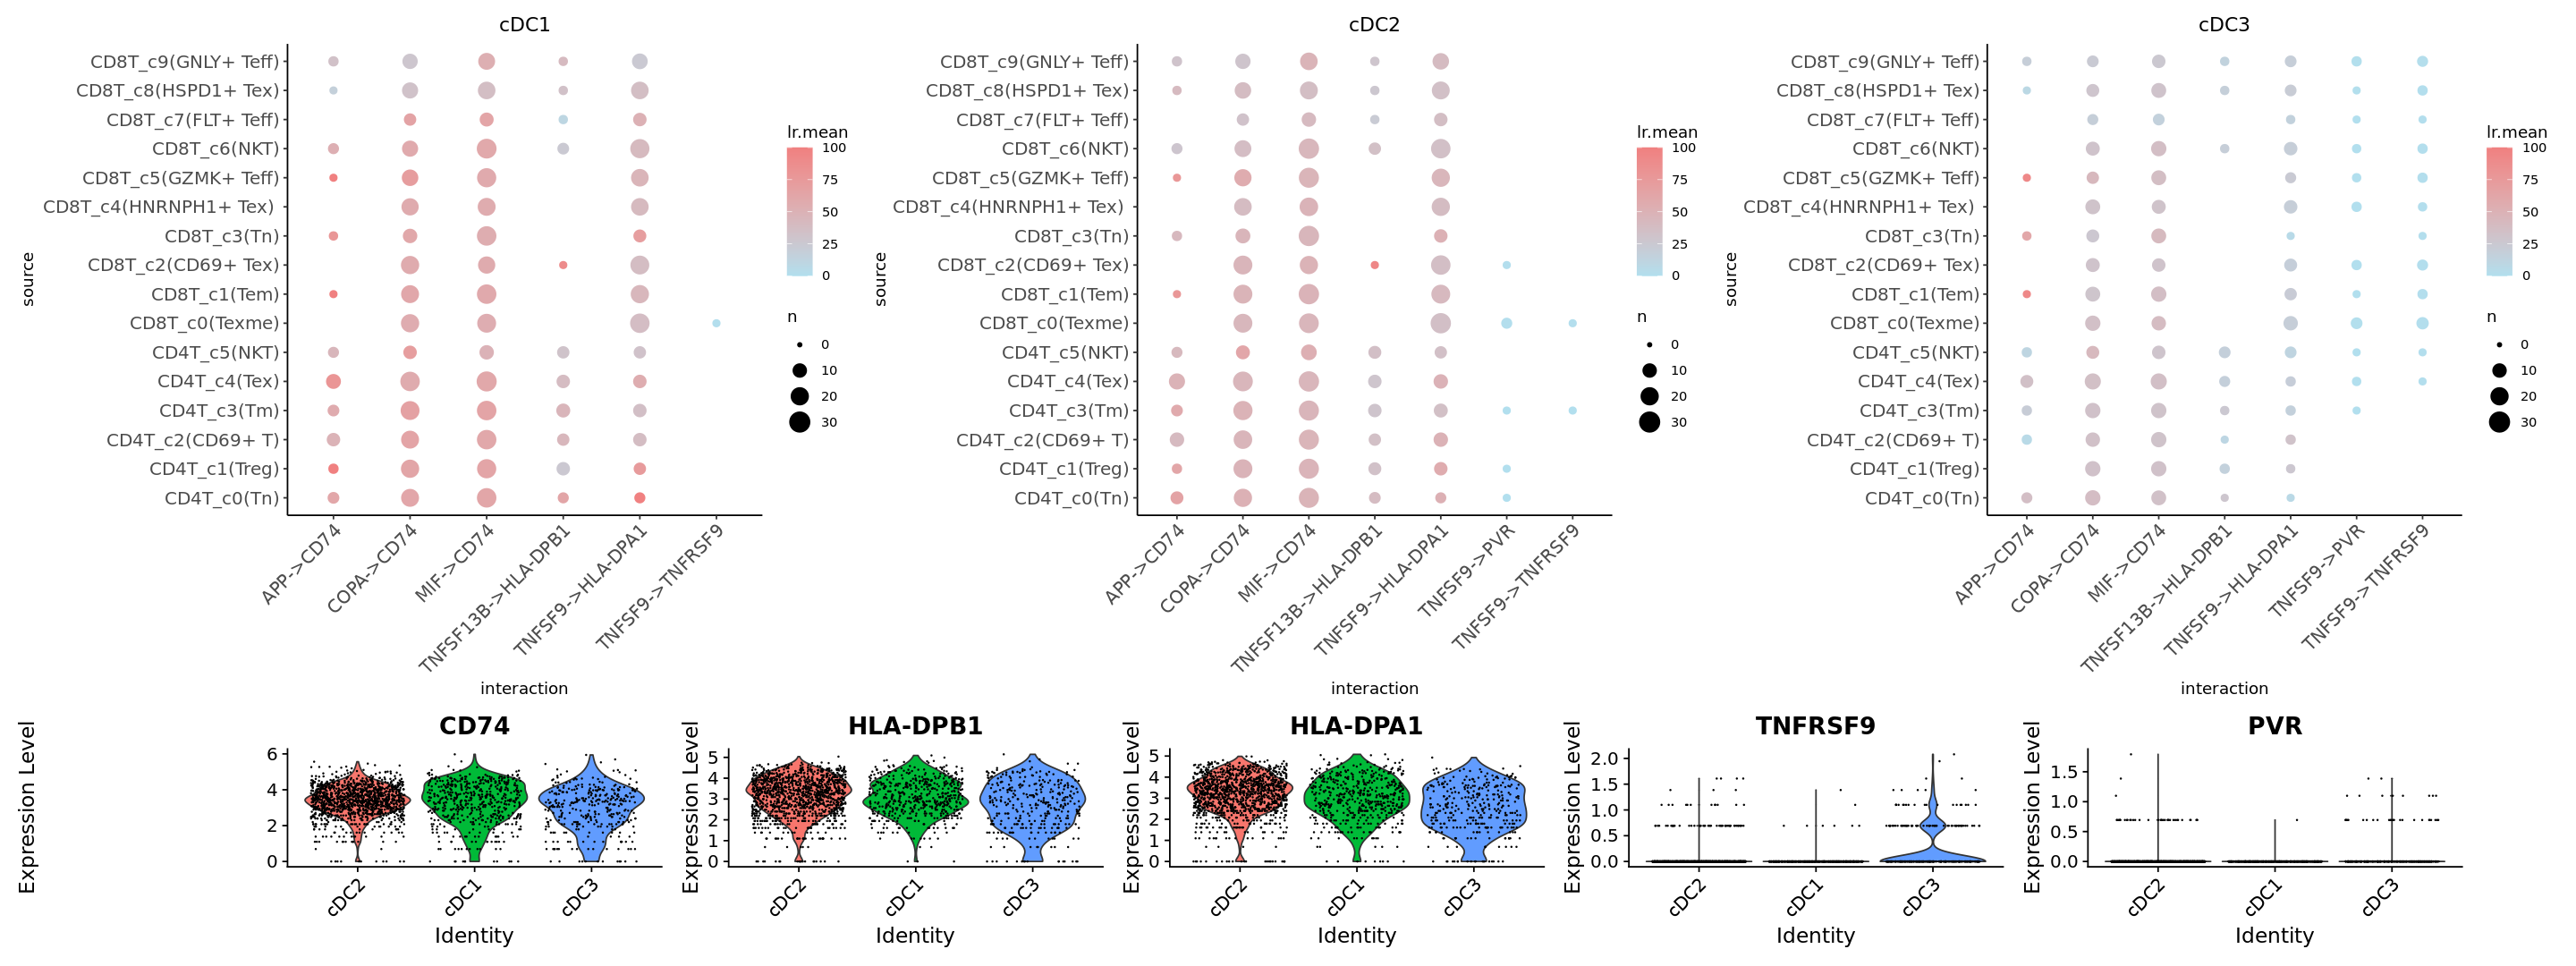

In [65]:
options(repr.plot.width=24, repr.plot.height=9)
(p1+p2+p3)/p4+  plot_layout(heights = c(4, 1))